In [1]:
"""
Import fractal dimension data and use Gaussian mixture clustering to obtain the
Hierarchical effect of fractal dimension
"""

'\nImport fractal dimension data and use Gaussian mixture clustering to obtain the\nHierarchical effect of fractal dimension\n'

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import manifold, datasets
import matplotlib.pyplot as plt

In [3]:
# import fractal dimensions data
# S: sandbox fractal dimension
# DBC1: DBC gray image fractal dimension
# DBC2: DBC binary graph fractal dimension
# RFD: Random walk method to generate fractal dimension
frac_data_stage1 = pd.read_csv(os.getcwd() + '/frac_data_1.csv')
frac_data_stage2 = pd.read_csv(os.getcwd() + '/frac_data_2.csv')
frac_data_stage3 = pd.read_csv(os.getcwd() + '/frac_data_3.csv')

In [4]:
frac_data_stage1.head()

,SFD,SandBox,D1,D2,RFD
0,1.415,1.544,2.124,1.501,2.318
1,1.366,1.515,2.083,1.455,2.305
2,1.416,1.607,2.107,1.505,2.296
3,1.426,1.629,2.113,1.514,2.304
4,1.374,1.638,2.073,1.467,2.319


In [5]:
frac_data_stage2 = frac_data_stage2.dropna()
frac_data_stage2.head()

,SFD,SandBox,D1,D2,RFD
0,1.547,1.630,2.255,1.616,2.242
1,1.509,1.672,2.202,1.574,2.284
2,1.485,1.588,2.194,1.548,2.298
3,1.558,1.687,2.232,1.646,2.268
4,1.461,1.649,2.147,1.546,2.301


In [6]:
frac_data_stage3.head()

,SFD,SandBox,D1,D2,RFD
0,1.558,1.668,2.285,1.593,2.291
1,1.527,1.631,2.228,1.586,2.299
2,1.563,1.662,2.279,1.603,2.280
3,1.547,1.690,2.225,1.619,2.300
4,1.544,1.699,2.229,1.610,2.310


## Store parameters of Gaussian mixture distribution

In [7]:
index_array = [["stage_{}".format(i+1) for i in range(3) for j in range(5)], list(frac_data_stage1.columns)*3]
index_tuples = list(zip(*index_array))
index = pd.MultiIndex.from_tuples(index_tuples, names=["Stage", "dimension"])
params_df = pd.DataFrame(index=index, columns=['Means', 'Variances', 'Weights'])

## Store fractal dimension hierarchies

In [8]:
stage_1 = pd.DataFrame()
stage_2 = pd.DataFrame()
stage_3 = pd.DataFrame()

## Obtain the hierarchical effect of rice fractal dimension in the first stage

### SFD fractal dimension hierarchies in stage 1

Text(0.5, 0, 'n_components')

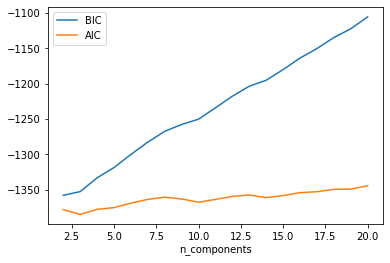

In [9]:
frac = np.array(frac_data_stage1['SFD']).reshape(-1, 1)
n_components = np.arange(2, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(frac)
          for n in n_components]

plt.plot(n_components, [m.bic(frac) for m in models], label='BIC')
plt.plot(n_components, [m.aic(frac) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [10]:
gmm=GaussianMixture(n_components=3)
gmm.fit(frac)
result=pd.Series(gmm.predict(frac))
print(result.value_counts())

1    255
2    147
0     21
dtype: int64


In [11]:
result = ["stage_1_frac_{}".format(i) for i in result]
result[:5]
stage_1['SFD'] = result
# pd.DataFrame(result).to_csv('~/SFD_stage_1.CSV')
stage_1

,SFD
0,stage_1_frac_1
1,stage_1_frac_2
2,stage_1_frac_1
3,stage_1_frac_1
4,stage_1_frac_2
...,...
418,stage_1_frac_2
419,stage_1_frac_2
420,stage_1_frac_2
421,stage_1_frac_2


In [12]:
mean = ','.join(["%.3e"%i[0] for i in gmm.means_])
var = ','.join(["%.3e"%i[0][0] for i in gmm.covariances_])
weight = ','.join(["%.3e"%i for i in gmm.weights_])
params_df.loc[('stage_1', 'SFD'), :] = [mean, var, weight]
# pd.DataFrame(data=[[mean, var, weight]], index=[('stage_1', 'SFD')], columns=['Means', 'Variances', 'Weights'])
params_df

Means  \
Stage   dimension                                  
stage_1 SFD        1.274e+00,1.434e+00,1.376e+00   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_2 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                       Variances  \
Stage   dimension                                  
stage_1 SFD        1.575e-03,7.526e-04,6.854e-04   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_2 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                         Weights  
Stage   dimension                                 
stage_1 SFD        5.722e-02,5.933e-01,3.495e-01  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN  
stage_2 SFD                                  NaN  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN  
stage_3 SFD                                  NaN  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN

### SandBox fractal dimension hierarchies in stage 1

Text(0.5, 0, 'n_components')

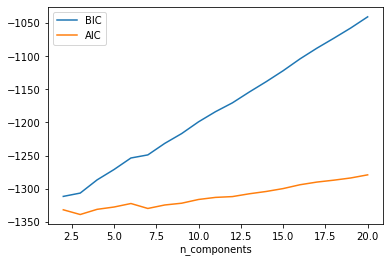

In [13]:
frac = np.array(frac_data_stage1['SandBox']).reshape(-1, 1)
n_components = np.arange(2, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(frac)
          for n in n_components]

plt.plot(n_components, [m.bic(frac) for m in models], label='BIC')
plt.plot(n_components, [m.aic(frac) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [14]:
gmm=GaussianMixture(n_components=3)
gmm.fit(frac)
result=pd.Series(gmm.predict(frac))
print(result.value_counts())

0    209
1    162
2     52
dtype: int64


In [15]:
result = ["stage_1_frac_{}".format(i) for i in result]
result[:5]
stage_1['SandBox'] = result
# pd.DataFrame(result).to_csv('~/SFD_stage_1.CSV')
stage_1

,SFD,SandBox
0,stage_1_frac_1,stage_1_frac_1
1,stage_1_frac_2,stage_1_frac_1
2,stage_1_frac_1,stage_1_frac_0
3,stage_1_frac_1,stage_1_frac_0
4,stage_1_frac_2,stage_1_frac_0
...,...,...
418,stage_1_frac_2,stage_1_frac_1
419,stage_1_frac_2,stage_1_frac_1
420,stage_1_frac_2,stage_1_frac_1
421,stage_1_frac_2,stage_1_frac_1


In [16]:
mean = ','.join(["%.3e"%i[0] for i in gmm.means_])
var = ','.join(["%.3e"%i[0][0] for i in gmm.covariances_])
weight = ','.join(["%.3e"%i for i in gmm.weights_])
params_df.loc[('stage_1', 'SandBox'), :] = [mean, var, weight]
# pd.DataFrame(data=[[mean, var, weight]], index=[('stage_1', 'SFD')], columns=['Means', 'Variances', 'Weights'])
params_df

Means  \
Stage   dimension                                  
stage_1 SFD        1.274e+00,1.434e+00,1.376e+00   
        SandBox    1.616e+00,1.560e+00,1.476e+00   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_2 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                       Variances  \
Stage   dimension                                  
stage_1 SFD        1.575e-03,7.526e-04,6.854e-04   
        SandBox    5.126e-04,5.303e-04,1.459e-03   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_2 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                         Weights  
Stage   dimension                                 
stage_1 SFD        5.722e-02,5.933e-01,3.495e-01  
        SandBox    4.920e-01,3.707e-01,1.373e-01  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN  
stage_2 SFD                                  NaN  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN  
stage_3 SFD                                  NaN  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN

### DBC1 fractal dimension hierarchies in stage 1

Text(0.5, 0, 'n_components')

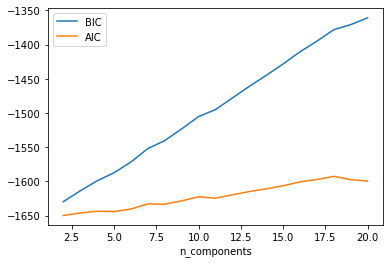

In [17]:
frac = np.array(frac_data_stage1['D1']).reshape(-1, 1)
n_components = np.arange(2, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(frac)
          for n in n_components]

plt.plot(n_components, [m.bic(frac) for m in models], label='BIC')
plt.plot(n_components, [m.aic(frac) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [18]:
gmm=GaussianMixture(n_components=2)
gmm.fit(frac)
result=pd.Series(gmm.predict(frac))
print(result.value_counts())

1    235
0    188
dtype: int64


In [19]:
result = ["stage_1_frac_{}".format(i) for i in result]
result[:5]
stage_1['D1'] = result
# pd.DataFrame(result).to_csv('~/SFD_stage_1.CSV')
stage_1

,SFD,SandBox,D1
0,stage_1_frac_1,stage_1_frac_1,stage_1_frac_1
1,stage_1_frac_2,stage_1_frac_1,stage_1_frac_0
2,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1
3,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1
4,stage_1_frac_2,stage_1_frac_0,stage_1_frac_0
...,...,...,...
418,stage_1_frac_2,stage_1_frac_1,stage_1_frac_0
419,stage_1_frac_2,stage_1_frac_1,stage_1_frac_0
420,stage_1_frac_2,stage_1_frac_1,stage_1_frac_0
421,stage_1_frac_2,stage_1_frac_1,stage_1_frac_0


In [20]:
mean = ','.join(["%.3e"%i[0] for i in gmm.means_])
var = ','.join(["%.3e"%i[0][0] for i in gmm.covariances_])
weight = ','.join(["%.3e"%i for i in gmm.weights_])
params_df.loc[('stage_1', 'D1'), :] = [mean, var, weight]
# pd.DataFrame(data=[[mean, var, weight]], index=[('stage_1', 'SFD')], columns=['Means', 'Variances', 'Weights'])
params_df

Means  \
Stage   dimension                                  
stage_1 SFD        1.274e+00,1.434e+00,1.376e+00   
        SandBox    1.616e+00,1.560e+00,1.476e+00   
        D1                   2.084e+00,2.123e+00   
        D2                                   NaN   
        RFD                                  NaN   
stage_2 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                       Variances  \
Stage   dimension                                  
stage_1 SFD        1.575e-03,7.526e-04,6.854e-04   
        SandBox    5.126e-04,5.303e-04,1.459e-03   
        D1                   8.045e-04,7.311e-04   
        D2                                   NaN   
        RFD                                  NaN   
stage_2 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                         Weights  
Stage   dimension                                 
stage_1 SFD        5.722e-02,5.933e-01,3.495e-01  
        SandBox    4.920e-01,3.707e-01,1.373e-01  
        D1                   4.620e-01,5.380e-01  
        D2                                   NaN  
        RFD                                  NaN  
stage_2 SFD                                  NaN  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN  
stage_3 SFD                                  NaN  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN

### DBC2 fractal dimension hierarchies in stage 1

Text(0.5, 0, 'n_components')

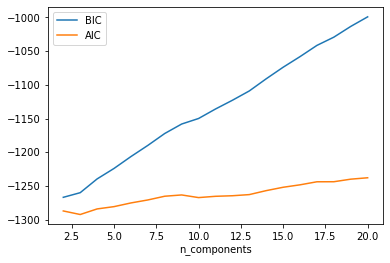

In [21]:
frac = np.array(frac_data_stage1['D2']).reshape(-1, 1)
n_components = np.arange(2, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(frac)
          for n in n_components]

plt.plot(n_components, [m.bic(frac) for m in models], label='BIC')
plt.plot(n_components, [m.aic(frac) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [22]:
gmm=GaussianMixture(n_components=3)
gmm.fit(frac)
result=pd.Series(gmm.predict(frac))
print(result.value_counts())

2    201
1    199
0     23
dtype: int64


In [23]:
result = ["stage_1_frac_{}".format(i) for i in result]
result[:5]
stage_1['D2'] = result
# pd.DataFrame(result).to_csv('~/SFD_stage_1.CSV')
stage_1

,SFD,SandBox,D1,D2
0,stage_1_frac_1,stage_1_frac_1,stage_1_frac_1,stage_1_frac_2
1,stage_1_frac_2,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1
2,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1,stage_1_frac_2
3,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1,stage_1_frac_2
4,stage_1_frac_2,stage_1_frac_0,stage_1_frac_0,stage_1_frac_1
...,...,...,...,...
418,stage_1_frac_2,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1
419,stage_1_frac_2,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1
420,stage_1_frac_2,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1
421,stage_1_frac_2,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1


In [24]:
mean = ','.join(["%.3e"%i[0] for i in gmm.means_])
var = ','.join(["%.3e"%i[0][0] for i in gmm.covariances_])
weight = ','.join(["%.3e"%i for i in gmm.weights_])
params_df.loc[('stage_1', 'D2'), :] = [mean, var, weight]
# pd.DataFrame(data=[[mean, var, weight]], index=[('stage_1', 'SFD')], columns=['Means', 'Variances', 'Weights'])
params_df

Means  \
Stage   dimension                                  
stage_1 SFD        1.274e+00,1.434e+00,1.376e+00   
        SandBox    1.616e+00,1.560e+00,1.476e+00   
        D1                   2.084e+00,2.123e+00   
        D2         1.375e+00,1.473e+00,1.529e+00   
        RFD                                  NaN   
stage_2 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                       Variances  \
Stage   dimension                                  
stage_1 SFD        1.575e-03,7.526e-04,6.854e-04   
        SandBox    5.126e-04,5.303e-04,1.459e-03   
        D1                   8.045e-04,7.311e-04   
        D2         4.766e-03,1.034e-03,7.910e-04   
        RFD                                  NaN   
stage_2 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                         Weights  
Stage   dimension                                 
stage_1 SFD        5.722e-02,5.933e-01,3.495e-01  
        SandBox    4.920e-01,3.707e-01,1.373e-01  
        D1                   4.620e-01,5.380e-01  
        D2         9.083e-02,4.573e-01,4.519e-01  
        RFD                                  NaN  
stage_2 SFD                                  NaN  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN  
stage_3 SFD                                  NaN  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN

### RFD fractal dimension hierarchies in stage 1

Text(0.5, 0, 'n_components')

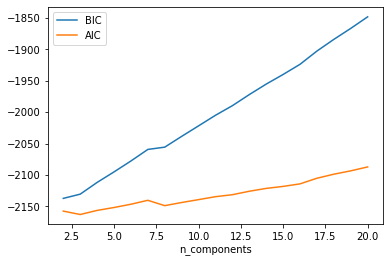

In [25]:
frac = np.array(frac_data_stage1['RFD']).reshape(-1, 1)
n_components = np.arange(2, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(frac)
          for n in n_components]

plt.plot(n_components, [m.bic(frac) for m in models], label='BIC')
plt.plot(n_components, [m.aic(frac) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [26]:
gmm=GaussianMixture(n_components=3)
gmm.fit(frac)
result=pd.Series(gmm.predict(frac))
print(result.value_counts())

2    206
0    166
1     51
dtype: int64


In [27]:
result = ["stage_1_frac_{}".format(i) for i in result]
result[:5]
stage_1['RFD'] = result
# pd.DataFrame(result).to_csv('~/SFD_stage_1.CSV')
stage_1

,SFD,SandBox,D1,D2,RFD
0,stage_1_frac_1,stage_1_frac_1,stage_1_frac_1,stage_1_frac_2,stage_1_frac_2
1,stage_1_frac_2,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1,stage_1_frac_2
2,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1,stage_1_frac_2,stage_1_frac_0
3,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1,stage_1_frac_2,stage_1_frac_2
4,stage_1_frac_2,stage_1_frac_0,stage_1_frac_0,stage_1_frac_1,stage_1_frac_2
...,...,...,...,...,...
418,stage_1_frac_2,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1,stage_1_frac_2
419,stage_1_frac_2,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1,stage_1_frac_1
420,stage_1_frac_2,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1,stage_1_frac_2
421,stage_1_frac_2,stage_1_frac_1,stage_1_frac_0,stage_1_frac_1,stage_1_frac_2


In [28]:
mean = ','.join(["%.3e"%i[0] for i in gmm.means_])
var = ','.join(["%.3e"%i[0][0] for i in gmm.covariances_])
weight = ','.join(["%.3e"%i for i in gmm.weights_])
params_df.loc[('stage_1', 'RFD'), :] = [mean, var, weight]
# pd.DataFrame(data=[[mean, var, weight]], index=[('stage_1', 'SFD')], columns=['Means', 'Variances', 'Weights'])
params_df

Means  \
Stage   dimension                                  
stage_1 SFD        1.274e+00,1.434e+00,1.376e+00   
        SandBox    1.616e+00,1.560e+00,1.476e+00   
        D1                   2.084e+00,2.123e+00   
        D2         1.375e+00,1.473e+00,1.529e+00   
        RFD        2.289e+00,2.334e+00,2.312e+00   
stage_2 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                       Variances  \
Stage   dimension                                  
stage_1 SFD        1.575e-03,7.526e-04,6.854e-04   
        SandBox    5.126e-04,5.303e-04,1.459e-03   
        D1                   8.045e-04,7.311e-04   
        D2         4.766e-03,1.034e-03,7.910e-04   
        RFD        9.123e-05,1.709e-04,7.603e-05   
stage_2 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                         Weights  
Stage   dimension                                 
stage_1 SFD        5.722e-02,5.933e-01,3.495e-01  
        SandBox    4.920e-01,3.707e-01,1.373e-01  
        D1                   4.620e-01,5.380e-01  
        D2         9.083e-02,4.573e-01,4.519e-01  
        RFD        4.058e-01,1.543e-01,4.399e-01  
stage_2 SFD                                  NaN  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN  
stage_3 SFD                                  NaN  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN

In [29]:
stage_1.columns = ['frac_' + i for i in stage_1.columns]
stage_1.to_csv(os.getcwd() + '/fractal_ hierarchies_stage_1.csv')

## Obtain the hierarchical effect of rice fractal dimension in the second stage

### SFD fractal dimension hierarchies in stage 2

Text(0.5, 0, 'n_components')

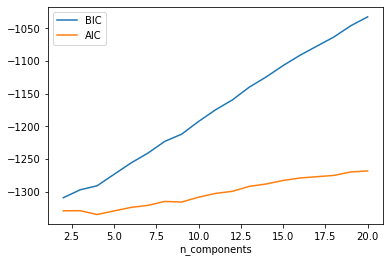

In [30]:
frac = np.array(frac_data_stage2['SFD']).reshape(-1, 1)
n_components = np.arange(2, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(frac)
          for n in n_components]

plt.plot(n_components, [m.bic(frac) for m in models], label='BIC')
plt.plot(n_components, [m.aic(frac) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [31]:
gmm=GaussianMixture(n_components=3)
gmm.fit(frac)
result=pd.Series(gmm.predict(frac))
print(result.value_counts())

0    197
1    131
2     74
dtype: int64


In [32]:
result = ["stage_2_frac_{}".format(i) for i in result]
result[:5]
stage_2['SFD'] = result
# pd.DataFrame(result).to_csv('~/SFD_stage_1.CSV')
stage_2

,SFD
0,stage_2_frac_1
1,stage_2_frac_0
2,stage_2_frac_0
3,stage_2_frac_1
4,stage_2_frac_2
...,...
397,stage_2_frac_0
398,stage_2_frac_0
399,stage_2_frac_0
400,stage_2_frac_0


In [33]:
mean = ','.join(["%.3e"%i[0] for i in gmm.means_])
var = ','.join(["%.3e"%i[0][0] for i in gmm.covariances_])
weight = ','.join(["%.3e"%i for i in gmm.weights_])
params_df.loc[('stage_2', 'SFD'), :] = [mean, var, weight]
# pd.DataFrame(data=[[mean, var, weight]], index=[('stage_1', 'SFD')], columns=['Means', 'Variances', 'Weights'])
params_df

Means  \
Stage   dimension                                  
stage_1 SFD        1.274e+00,1.434e+00,1.376e+00   
        SandBox    1.616e+00,1.560e+00,1.476e+00   
        D1                   2.084e+00,2.123e+00   
        D2         1.375e+00,1.473e+00,1.529e+00   
        RFD        2.289e+00,2.334e+00,2.312e+00   
stage_2 SFD        1.514e+00,1.558e+00,1.461e+00   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                       Variances  \
Stage   dimension                                  
stage_1 SFD        1.575e-03,7.526e-04,6.854e-04   
        SandBox    5.126e-04,5.303e-04,1.459e-03   
        D1                   8.045e-04,7.311e-04   
        D2         4.766e-03,1.034e-03,7.910e-04   
        RFD        9.123e-05,1.709e-04,7.603e-05   
stage_2 SFD        7.344e-04,1.069e-03,6.743e-04   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                         Weights  
Stage   dimension                                 
stage_1 SFD        5.722e-02,5.933e-01,3.495e-01  
        SandBox    4.920e-01,3.707e-01,1.373e-01  
        D1                   4.620e-01,5.380e-01  
        D2         9.083e-02,4.573e-01,4.519e-01  
        RFD        4.058e-01,1.543e-01,4.399e-01  
stage_2 SFD        4.305e-01,3.630e-01,2.066e-01  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN  
stage_3 SFD                                  NaN  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN

### SandBox fractal dimension hierarchies in stage 2

Text(0.5, 0, 'n_components')

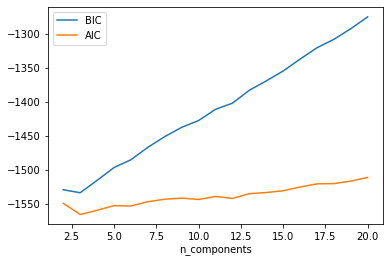

In [34]:
frac = np.array(frac_data_stage2['SandBox']).reshape(-1, 1)
n_components = np.arange(2, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(frac)
          for n in n_components]

plt.plot(n_components, [m.bic(frac) for m in models], label='BIC')
plt.plot(n_components, [m.aic(frac) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [35]:
gmm=GaussianMixture(n_components=3)
gmm.fit(frac)
result=pd.Series(gmm.predict(frac))
print(result.value_counts())

0    247
2    121
1     34
dtype: int64


In [36]:
result = ["stage_2_frac_{}".format(i) for i in result]
result[:5]
stage_2['SandBox'] = result
# pd.DataFrame(result).to_csv('~/SFD_stage_1.CSV')
stage_2

,SFD,SandBox
0,stage_2_frac_1,stage_2_frac_2
1,stage_2_frac_0,stage_2_frac_0
2,stage_2_frac_0,stage_2_frac_1
3,stage_2_frac_1,stage_2_frac_0
4,stage_2_frac_2,stage_2_frac_2
...,...,...
397,stage_2_frac_0,stage_2_frac_2
398,stage_2_frac_0,stage_2_frac_2
399,stage_2_frac_0,stage_2_frac_0
400,stage_2_frac_0,stage_2_frac_2


In [37]:
mean = ','.join(["%.3e"%i[0] for i in gmm.means_])
var = ','.join(["%.3e"%i[0][0] for i in gmm.covariances_])
weight = ','.join(["%.3e"%i for i in gmm.weights_])
params_df.loc[('stage_2', 'SandBox'), :] = [mean, var, weight]
# pd.DataFrame(data=[[mean, var, weight]], index=[('stage_1', 'SFD')], columns=['Means', 'Variances', 'Weights'])
params_df

Means  \
Stage   dimension                                  
stage_1 SFD        1.274e+00,1.434e+00,1.376e+00   
        SandBox    1.616e+00,1.560e+00,1.476e+00   
        D1                   2.084e+00,2.123e+00   
        D2         1.375e+00,1.473e+00,1.529e+00   
        RFD        2.289e+00,2.334e+00,2.312e+00   
stage_2 SFD        1.514e+00,1.558e+00,1.461e+00   
        SandBox    1.681e+00,1.571e+00,1.635e+00   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                       Variances  \
Stage   dimension                                  
stage_1 SFD        1.575e-03,7.526e-04,6.854e-04   
        SandBox    5.126e-04,5.303e-04,1.459e-03   
        D1                   8.045e-04,7.311e-04   
        D2         4.766e-03,1.034e-03,7.910e-04   
        RFD        9.123e-05,1.709e-04,7.603e-05   
stage_2 SFD        7.344e-04,1.069e-03,6.743e-04   
        SandBox    2.543e-04,9.810e-04,3.456e-04   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                         Weights  
Stage   dimension                                 
stage_1 SFD        5.722e-02,5.933e-01,3.495e-01  
        SandBox    4.920e-01,3.707e-01,1.373e-01  
        D1                   4.620e-01,5.380e-01  
        D2         9.083e-02,4.573e-01,4.519e-01  
        RFD        4.058e-01,1.543e-01,4.399e-01  
stage_2 SFD        4.305e-01,3.630e-01,2.066e-01  
        SandBox    5.968e-01,9.508e-02,3.081e-01  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN  
stage_3 SFD                                  NaN  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN

### DBC1 fractal dimension hierarchies in stage 2

Text(0.5, 0, 'n_components')

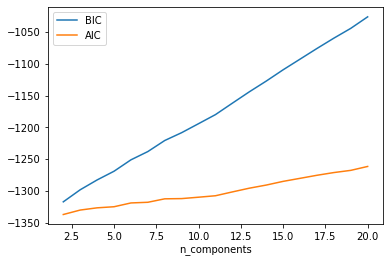

In [38]:
frac = np.array(frac_data_stage2['D1']).reshape(-1, 1)
n_components = np.arange(2, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(frac)
          for n in n_components]

plt.plot(n_components, [m.bic(frac) for m in models], label='BIC')
plt.plot(n_components, [m.aic(frac) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [39]:
gmm=GaussianMixture(n_components=2)
gmm.fit(frac)
result=pd.Series(gmm.predict(frac))
print(result.value_counts())

0    214
1    188
dtype: int64


In [40]:
result = ["stage_2_frac_{}".format(i) for i in result]
result[:5]
stage_2['D1'] = result
# pd.DataFrame(result).to_csv('~/SFD_stage_1.CSV')
stage_2

,SFD,SandBox,D1
0,stage_2_frac_1,stage_2_frac_2,stage_2_frac_0
1,stage_2_frac_0,stage_2_frac_0,stage_2_frac_0
2,stage_2_frac_0,stage_2_frac_1,stage_2_frac_1
3,stage_2_frac_1,stage_2_frac_0,stage_2_frac_0
4,stage_2_frac_2,stage_2_frac_2,stage_2_frac_1
...,...,...,...
397,stage_2_frac_0,stage_2_frac_2,stage_2_frac_0
398,stage_2_frac_0,stage_2_frac_2,stage_2_frac_1
399,stage_2_frac_0,stage_2_frac_0,stage_2_frac_1
400,stage_2_frac_0,stage_2_frac_2,stage_2_frac_0


In [41]:
mean = ','.join(["%.3e"%i[0] for i in gmm.means_])
var = ','.join(["%.3e"%i[0][0] for i in gmm.covariances_])
weight = ','.join(["%.3e"%i for i in gmm.weights_])
params_df.loc[('stage_2', 'D1'), :] = [mean, var, weight]
# pd.DataFrame(data=[[mean, var, weight]], index=[('stage_1', 'SFD')], columns=['Means', 'Variances', 'Weights'])
params_df

Means  \
Stage   dimension                                  
stage_1 SFD        1.274e+00,1.434e+00,1.376e+00   
        SandBox    1.616e+00,1.560e+00,1.476e+00   
        D1                   2.084e+00,2.123e+00   
        D2         1.375e+00,1.473e+00,1.529e+00   
        RFD        2.289e+00,2.334e+00,2.312e+00   
stage_2 SFD        1.514e+00,1.558e+00,1.461e+00   
        SandBox    1.681e+00,1.571e+00,1.635e+00   
        D1                   2.232e+00,2.161e+00   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                       Variances  \
Stage   dimension                                  
stage_1 SFD        1.575e-03,7.526e-04,6.854e-04   
        SandBox    5.126e-04,5.303e-04,1.459e-03   
        D1                   8.045e-04,7.311e-04   
        D2         4.766e-03,1.034e-03,7.910e-04   
        RFD        9.123e-05,1.709e-04,7.603e-05   
stage_2 SFD        7.344e-04,1.069e-03,6.743e-04   
        SandBox    2.543e-04,9.810e-04,3.456e-04   
        D1                   8.604e-04,9.106e-04   
        D2                                   NaN   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                         Weights  
Stage   dimension                                 
stage_1 SFD        5.722e-02,5.933e-01,3.495e-01  
        SandBox    4.920e-01,3.707e-01,1.373e-01  
        D1                   4.620e-01,5.380e-01  
        D2         9.083e-02,4.573e-01,4.519e-01  
        RFD        4.058e-01,1.543e-01,4.399e-01  
stage_2 SFD        4.305e-01,3.630e-01,2.066e-01  
        SandBox    5.968e-01,9.508e-02,3.081e-01  
        D1                   5.240e-01,4.760e-01  
        D2                                   NaN  
        RFD                                  NaN  
stage_3 SFD                                  NaN  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN

### DBC2 fractal dimension hierarchies in stage 2

Text(0.5, 0, 'n_components')

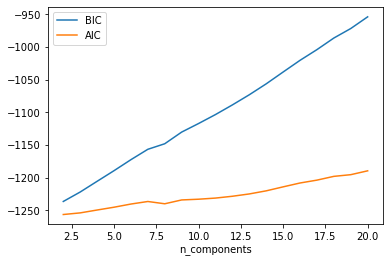

In [42]:
frac = np.array(frac_data_stage2['D2']).reshape(-1, 1)
n_components = np.arange(2, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(frac)
          for n in n_components]

plt.plot(n_components, [m.bic(frac) for m in models], label='BIC')
plt.plot(n_components, [m.aic(frac) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [43]:
gmm=GaussianMixture(n_components=2)
gmm.fit(frac)
result=pd.Series(gmm.predict(frac))
print(result.value_counts())

0    213
1    189
dtype: int64


In [44]:
result = ["stage_2_frac_{}".format(i) for i in result]
result[:5]
stage_2['D2'] = result
# pd.DataFrame(result).to_csv('~/SFD_stage_1.CSV')
stage_2

,SFD,SandBox,D1,D2
0,stage_2_frac_1,stage_2_frac_2,stage_2_frac_0,stage_2_frac_0
1,stage_2_frac_0,stage_2_frac_0,stage_2_frac_0,stage_2_frac_1
2,stage_2_frac_0,stage_2_frac_1,stage_2_frac_1,stage_2_frac_1
3,stage_2_frac_1,stage_2_frac_0,stage_2_frac_0,stage_2_frac_0
4,stage_2_frac_2,stage_2_frac_2,stage_2_frac_1,stage_2_frac_1
...,...,...,...,...
397,stage_2_frac_0,stage_2_frac_2,stage_2_frac_0,stage_2_frac_0
398,stage_2_frac_0,stage_2_frac_2,stage_2_frac_1,stage_2_frac_1
399,stage_2_frac_0,stage_2_frac_0,stage_2_frac_1,stage_2_frac_1
400,stage_2_frac_0,stage_2_frac_2,stage_2_frac_0,stage_2_frac_0


In [45]:
mean = ','.join(["%.3e"%i[0] for i in gmm.means_])
var = ','.join(["%.3e"%i[0][0] for i in gmm.covariances_])
weight = ','.join(["%.3e"%i for i in gmm.weights_])
params_df.loc[('stage_2', 'D2'), :] = [mean, var, weight]
# pd.DataFrame(data=[[mean, var, weight]], index=[('stage_1', 'SFD')], columns=['Means', 'Variances', 'Weights'])
params_df

Means  \
Stage   dimension                                  
stage_1 SFD        1.274e+00,1.434e+00,1.376e+00   
        SandBox    1.616e+00,1.560e+00,1.476e+00   
        D1                   2.084e+00,2.123e+00   
        D2         1.375e+00,1.473e+00,1.529e+00   
        RFD        2.289e+00,2.334e+00,2.312e+00   
stage_2 SFD        1.514e+00,1.558e+00,1.461e+00   
        SandBox    1.681e+00,1.571e+00,1.635e+00   
        D1                   2.232e+00,2.161e+00   
        D2                   1.629e+00,1.567e+00   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                       Variances  \
Stage   dimension                                  
stage_1 SFD        1.575e-03,7.526e-04,6.854e-04   
        SandBox    5.126e-04,5.303e-04,1.459e-03   
        D1                   8.045e-04,7.311e-04   
        D2         4.766e-03,1.034e-03,7.910e-04   
        RFD        9.123e-05,1.709e-04,7.603e-05   
stage_2 SFD        7.344e-04,1.069e-03,6.743e-04   
        SandBox    2.543e-04,9.810e-04,3.456e-04   
        D1                   8.604e-04,9.106e-04   
        D2                   1.452e-03,1.630e-03   
        RFD                                  NaN   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                         Weights  
Stage   dimension                                 
stage_1 SFD        5.722e-02,5.933e-01,3.495e-01  
        SandBox    4.920e-01,3.707e-01,1.373e-01  
        D1                   4.620e-01,5.380e-01  
        D2         9.083e-02,4.573e-01,4.519e-01  
        RFD        4.058e-01,1.543e-01,4.399e-01  
stage_2 SFD        4.305e-01,3.630e-01,2.066e-01  
        SandBox    5.968e-01,9.508e-02,3.081e-01  
        D1                   5.240e-01,4.760e-01  
        D2                   5.162e-01,4.838e-01  
        RFD                                  NaN  
stage_3 SFD                                  NaN  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN

### RFD fractal dimension hierarchies in stage 2

Text(0.5, 0, 'n_components')

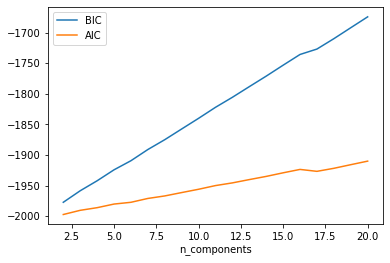

In [46]:
frac = np.array(frac_data_stage2['RFD']).reshape(-1, 1)
n_components = np.arange(2, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(frac)
          for n in n_components]

plt.plot(n_components, [m.bic(frac) for m in models], label='BIC')
plt.plot(n_components, [m.aic(frac) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [47]:
gmm=GaussianMixture(n_components=2)
gmm.fit(frac)
result=pd.Series(gmm.predict(frac))
print(result.value_counts())

1    241
0    161
dtype: int64


In [48]:
result = ["stage_2_frac_{}".format(i) for i in result]
result[:5]
stage_2['RFD'] = result
# pd.DataFrame(result).to_csv('~/SFD_stage_1.CSV')
stage_2

,SFD,SandBox,D1,D2,RFD
0,stage_2_frac_1,stage_2_frac_2,stage_2_frac_0,stage_2_frac_0,stage_2_frac_1
1,stage_2_frac_0,stage_2_frac_0,stage_2_frac_0,stage_2_frac_1,stage_2_frac_0
2,stage_2_frac_0,stage_2_frac_1,stage_2_frac_1,stage_2_frac_1,stage_2_frac_0
3,stage_2_frac_1,stage_2_frac_0,stage_2_frac_0,stage_2_frac_0,stage_2_frac_1
4,stage_2_frac_2,stage_2_frac_2,stage_2_frac_1,stage_2_frac_1,stage_2_frac_0
...,...,...,...,...,...
397,stage_2_frac_0,stage_2_frac_2,stage_2_frac_0,stage_2_frac_0,stage_2_frac_1
398,stage_2_frac_0,stage_2_frac_2,stage_2_frac_1,stage_2_frac_1,stage_2_frac_0
399,stage_2_frac_0,stage_2_frac_0,stage_2_frac_1,stage_2_frac_1,stage_2_frac_0
400,stage_2_frac_0,stage_2_frac_2,stage_2_frac_0,stage_2_frac_0,stage_2_frac_1


In [49]:
mean = ','.join(["%.3e"%i[0] for i in gmm.means_])
var = ','.join(["%.3e"%i[0][0] for i in gmm.covariances_])
weight = ','.join(["%.3e"%i for i in gmm.weights_])
params_df.loc[('stage_2', 'RFD'), :] = [mean, var, weight]
# pd.DataFrame(data=[[mean, var, weight]], index=[('stage_1', 'SFD')], columns=['Means', 'Variances', 'Weights'])
params_df

Means  \
Stage   dimension                                  
stage_1 SFD        1.274e+00,1.434e+00,1.376e+00   
        SandBox    1.616e+00,1.560e+00,1.476e+00   
        D1                   2.084e+00,2.123e+00   
        D2         1.375e+00,1.473e+00,1.529e+00   
        RFD        2.289e+00,2.334e+00,2.312e+00   
stage_2 SFD        1.514e+00,1.558e+00,1.461e+00   
        SandBox    1.681e+00,1.571e+00,1.635e+00   
        D1                   2.232e+00,2.161e+00   
        D2                   1.629e+00,1.567e+00   
        RFD                  2.294e+00,2.265e+00   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                       Variances  \
Stage   dimension                                  
stage_1 SFD        1.575e-03,7.526e-04,6.854e-04   
        SandBox    5.126e-04,5.303e-04,1.459e-03   
        D1                   8.045e-04,7.311e-04   
        D2         4.766e-03,1.034e-03,7.910e-04   
        RFD        9.123e-05,1.709e-04,7.603e-05   
stage_2 SFD        7.344e-04,1.069e-03,6.743e-04   
        SandBox    2.543e-04,9.810e-04,3.456e-04   
        D1                   8.604e-04,9.106e-04   
        D2                   1.452e-03,1.630e-03   
        RFD                  2.378e-04,1.710e-04   
stage_3 SFD                                  NaN   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                         Weights  
Stage   dimension                                 
stage_1 SFD        5.722e-02,5.933e-01,3.495e-01  
        SandBox    4.920e-01,3.707e-01,1.373e-01  
        D1                   4.620e-01,5.380e-01  
        D2         9.083e-02,4.573e-01,4.519e-01  
        RFD        4.058e-01,1.543e-01,4.399e-01  
stage_2 SFD        4.305e-01,3.630e-01,2.066e-01  
        SandBox    5.968e-01,9.508e-02,3.081e-01  
        D1                   5.240e-01,4.760e-01  
        D2                   5.162e-01,4.838e-01  
        RFD                  4.441e-01,5.559e-01  
stage_3 SFD                                  NaN  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN

In [50]:
stage_2.columns = ['frac_' + i for i in stage_2.columns]
stage_2.to_csv(os.getcwd() + '/fractal_ hierarchies_stage_2.csv')

## Obtain the hierarchical effect of rice fractal dimension in the third stage

### SFD fractal dimension hierarchies in stage 3

Text(0.5, 0, 'n_components')

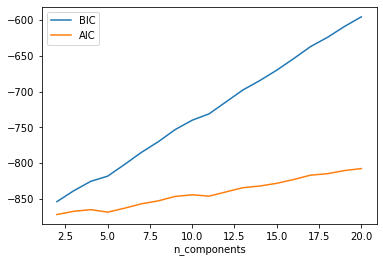

In [51]:
frac = np.array(frac_data_stage3['SFD']).reshape(-1, 1)
n_components = np.arange(2, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(frac)
          for n in n_components]

plt.plot(n_components, [m.bic(frac) for m in models], label='BIC')
plt.plot(n_components, [m.aic(frac) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [52]:
gmm=GaussianMixture(n_components=2)
gmm.fit(frac)
result=pd.Series(gmm.predict(frac))
print(result.value_counts())

0    148
1    121
dtype: int64


In [53]:
result = ["stage_3_frac_{}".format(i) for i in result]
result[:5]
stage_3['SFD'] = result
# pd.DataFrame(result).to_csv('~/SFD_stage_1.CSV')
stage_3

,SFD
0,stage_3_frac_0
1,stage_3_frac_1
2,stage_3_frac_0
3,stage_3_frac_0
4,stage_3_frac_0
...,...
264,stage_3_frac_0
265,stage_3_frac_1
266,stage_3_frac_0
267,stage_3_frac_0


In [54]:
mean = ','.join(["%.3e"%i[0] for i in gmm.means_])
var = ','.join(["%.3e"%i[0][0] for i in gmm.covariances_])
weight = ','.join(["%.3e"%i for i in gmm.weights_])
params_df.loc[('stage_3', 'SFD'), :] = [mean, var, weight]
# pd.DataFrame(data=[[mean, var, weight]], index=[('stage_1', 'SFD')], columns=['Means', 'Variances', 'Weights'])
params_df

Means  \
Stage   dimension                                  
stage_1 SFD        1.274e+00,1.434e+00,1.376e+00   
        SandBox    1.616e+00,1.560e+00,1.476e+00   
        D1                   2.084e+00,2.123e+00   
        D2         1.375e+00,1.473e+00,1.529e+00   
        RFD        2.289e+00,2.334e+00,2.312e+00   
stage_2 SFD        1.514e+00,1.558e+00,1.461e+00   
        SandBox    1.681e+00,1.571e+00,1.635e+00   
        D1                   2.232e+00,2.161e+00   
        D2                   1.629e+00,1.567e+00   
        RFD                  2.294e+00,2.265e+00   
stage_3 SFD                  1.566e+00,1.509e+00   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                       Variances  \
Stage   dimension                                  
stage_1 SFD        1.575e-03,7.526e-04,6.854e-04   
        SandBox    5.126e-04,5.303e-04,1.459e-03   
        D1                   8.045e-04,7.311e-04   
        D2         4.766e-03,1.034e-03,7.910e-04   
        RFD        9.123e-05,1.709e-04,7.603e-05   
stage_2 SFD        7.344e-04,1.069e-03,6.743e-04   
        SandBox    2.543e-04,9.810e-04,3.456e-04   
        D1                   8.604e-04,9.106e-04   
        D2                   1.452e-03,1.630e-03   
        RFD                  2.378e-04,1.710e-04   
stage_3 SFD                  1.155e-03,1.699e-03   
        SandBox                              NaN   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                         Weights  
Stage   dimension                                 
stage_1 SFD        5.722e-02,5.933e-01,3.495e-01  
        SandBox    4.920e-01,3.707e-01,1.373e-01  
        D1                   4.620e-01,5.380e-01  
        D2         9.083e-02,4.573e-01,4.519e-01  
        RFD        4.058e-01,1.543e-01,4.399e-01  
stage_2 SFD        4.305e-01,3.630e-01,2.066e-01  
        SandBox    5.968e-01,9.508e-02,3.081e-01  
        D1                   5.240e-01,4.760e-01  
        D2                   5.162e-01,4.838e-01  
        RFD                  4.441e-01,5.559e-01  
stage_3 SFD                  5.176e-01,4.824e-01  
        SandBox                              NaN  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN

### SandBox fractal dimension hierarchies in stage 3

Text(0.5, 0, 'n_components')

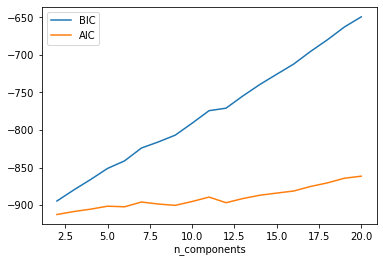

In [55]:
frac = np.array(frac_data_stage3['SandBox']).reshape(-1, 1)
n_components = np.arange(2, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(frac)
          for n in n_components]

plt.plot(n_components, [m.bic(frac) for m in models], label='BIC')
plt.plot(n_components, [m.aic(frac) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [56]:
gmm=GaussianMixture(n_components=2)
gmm.fit(frac)
result=pd.Series(gmm.predict(frac))
print(result.value_counts())

0    195
1     74
dtype: int64


In [57]:
result = ["stage_3_frac_{}".format(i) for i in result]
result[:5]
stage_3['SandBox'] = result
# pd.DataFrame(result).to_csv('~/SFD_stage_1.CSV')
stage_3

,SFD,SandBox
0,stage_3_frac_0,stage_3_frac_0
1,stage_3_frac_1,stage_3_frac_1
2,stage_3_frac_0,stage_3_frac_0
3,stage_3_frac_0,stage_3_frac_0
4,stage_3_frac_0,stage_3_frac_0
...,...,...
264,stage_3_frac_0,stage_3_frac_0
265,stage_3_frac_1,stage_3_frac_0
266,stage_3_frac_0,stage_3_frac_0
267,stage_3_frac_0,stage_3_frac_0


In [58]:
mean = ','.join(["%.3e"%i[0] for i in gmm.means_])
var = ','.join(["%.3e"%i[0][0] for i in gmm.covariances_])
weight = ','.join(["%.3e"%i for i in gmm.weights_])
params_df.loc[('stage_3', 'SandBox'), :] = [mean, var, weight]
# pd.DataFrame(data=[[mean, var, weight]], index=[('stage_1', 'SFD')], columns=['Means', 'Variances', 'Weights'])
params_df

Means  \
Stage   dimension                                  
stage_1 SFD        1.274e+00,1.434e+00,1.376e+00   
        SandBox    1.616e+00,1.560e+00,1.476e+00   
        D1                   2.084e+00,2.123e+00   
        D2         1.375e+00,1.473e+00,1.529e+00   
        RFD        2.289e+00,2.334e+00,2.312e+00   
stage_2 SFD        1.514e+00,1.558e+00,1.461e+00   
        SandBox    1.681e+00,1.571e+00,1.635e+00   
        D1                   2.232e+00,2.161e+00   
        D2                   1.629e+00,1.567e+00   
        RFD                  2.294e+00,2.265e+00   
stage_3 SFD                  1.566e+00,1.509e+00   
        SandBox              1.691e+00,1.616e+00   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                       Variances  \
Stage   dimension                                  
stage_1 SFD        1.575e-03,7.526e-04,6.854e-04   
        SandBox    5.126e-04,5.303e-04,1.459e-03   
        D1                   8.045e-04,7.311e-04   
        D2         4.766e-03,1.034e-03,7.910e-04   
        RFD        9.123e-05,1.709e-04,7.603e-05   
stage_2 SFD        7.344e-04,1.069e-03,6.743e-04   
        SandBox    2.543e-04,9.810e-04,3.456e-04   
        D1                   8.604e-04,9.106e-04   
        D2                   1.452e-03,1.630e-03   
        RFD                  2.378e-04,1.710e-04   
stage_3 SFD                  1.155e-03,1.699e-03   
        SandBox              6.882e-04,1.877e-03   
        D1                                   NaN   
        D2                                   NaN   
        RFD                                  NaN   

                                         Weights  
Stage   dimension                                 
stage_1 SFD        5.722e-02,5.933e-01,3.495e-01  
        SandBox    4.920e-01,3.707e-01,1.373e-01  
        D1                   4.620e-01,5.380e-01  
        D2         9.083e-02,4.573e-01,4.519e-01  
        RFD        4.058e-01,1.543e-01,4.399e-01  
stage_2 SFD        4.305e-01,3.630e-01,2.066e-01  
        SandBox    5.968e-01,9.508e-02,3.081e-01  
        D1                   5.240e-01,4.760e-01  
        D2                   5.162e-01,4.838e-01  
        RFD                  4.441e-01,5.559e-01  
stage_3 SFD                  5.176e-01,4.824e-01  
        SandBox              6.906e-01,3.094e-01  
        D1                                   NaN  
        D2                                   NaN  
        RFD                                  NaN

### DBC1 fractal dimension hierarchies in stage 3

Text(0.5, 0, 'n_components')

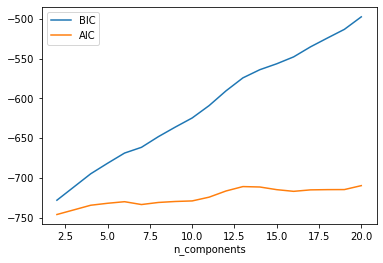

In [59]:
frac = np.array(frac_data_stage3['D1']).reshape(-1, 1)
n_components = np.arange(2, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(frac)
          for n in n_components]

plt.plot(n_components, [m.bic(frac) for m in models], label='BIC')
plt.plot(n_components, [m.aic(frac) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [60]:
gmm=GaussianMixture(n_components=2)
gmm.fit(frac)
result=pd.Series(gmm.predict(frac))
print(result.value_counts())

1    151
0    118
dtype: int64


In [61]:
result = ["stage_3_frac_{}".format(i) for i in result]
result[:5]
stage_3['D1'] = result
# pd.DataFrame(result).to_csv('~/SFD_stage_1.CSV')
stage_3

,SFD,SandBox,D1
0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0
1,stage_3_frac_1,stage_3_frac_1,stage_3_frac_1
2,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0
3,stage_3_frac_0,stage_3_frac_0,stage_3_frac_1
4,stage_3_frac_0,stage_3_frac_0,stage_3_frac_1
...,...,...,...
264,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0
265,stage_3_frac_1,stage_3_frac_0,stage_3_frac_1
266,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0
267,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0


In [62]:
mean = ','.join(["%.3e"%i[0] for i in gmm.means_])
var = ','.join(["%.3e"%i[0][0] for i in gmm.covariances_])
weight = ','.join(["%.3e"%i for i in gmm.weights_])
params_df.loc[('stage_3', 'D1'), :] = [mean, var, weight]
# pd.DataFrame(data=[[mean, var, weight]], index=[('stage_1', 'SFD')], columns=['Means', 'Variances', 'Weights'])
params_df

Means  \
Stage   dimension                                  
stage_1 SFD        1.274e+00,1.434e+00,1.376e+00   
        SandBox    1.616e+00,1.560e+00,1.476e+00   
        D1                   2.084e+00,2.123e+00   
        D2         1.375e+00,1.473e+00,1.529e+00   
        RFD        2.289e+00,2.334e+00,2.312e+00   
stage_2 SFD        1.514e+00,1.558e+00,1.461e+00   
        SandBox    1.681e+00,1.571e+00,1.635e+00   
        D1                   2.232e+00,2.161e+00   
        D2                   1.629e+00,1.567e+00   
        RFD                  2.294e+00,2.265e+00   
stage_3 SFD                  1.566e+00,1.509e+00   
        SandBox              1.691e+00,1.616e+00   
        D1                   2.276e+00,2.198e+00   
        D2                                   NaN   
        RFD                                  NaN   

                                       Variances  \
Stage   dimension                                  
stage_1 SFD        1.575e-03,7.526e-04,6.854e-04   
        SandBox    5.126e-04,5.303e-04,1.459e-03   
        D1                   8.045e-04,7.311e-04   
        D2         4.766e-03,1.034e-03,7.910e-04   
        RFD        9.123e-05,1.709e-04,7.603e-05   
stage_2 SFD        7.344e-04,1.069e-03,6.743e-04   
        SandBox    2.543e-04,9.810e-04,3.456e-04   
        D1                   8.604e-04,9.106e-04   
        D2                   1.452e-03,1.630e-03   
        RFD                  2.378e-04,1.710e-04   
stage_3 SFD                  1.155e-03,1.699e-03   
        SandBox              6.882e-04,1.877e-03   
        D1                   2.118e-03,1.947e-03   
        D2                                   NaN   
        RFD                                  NaN   

                                         Weights  
Stage   dimension                                 
stage_1 SFD        5.722e-02,5.933e-01,3.495e-01  
        SandBox    4.920e-01,3.707e-01,1.373e-01  
        D1                   4.620e-01,5.380e-01  
        D2         9.083e-02,4.573e-01,4.519e-01  
        RFD        4.058e-01,1.543e-01,4.399e-01  
stage_2 SFD        4.305e-01,3.630e-01,2.066e-01  
        SandBox    5.968e-01,9.508e-02,3.081e-01  
        D1                   5.240e-01,4.760e-01  
        D2                   5.162e-01,4.838e-01  
        RFD                  4.441e-01,5.559e-01  
stage_3 SFD                  5.176e-01,4.824e-01  
        SandBox              6.906e-01,3.094e-01  
        D1                   4.583e-01,5.417e-01  
        D2                                   NaN  
        RFD                                  NaN

### DBC2 fractal dimension hierarchies in stage 3

Text(0.5, 0, 'n_components')

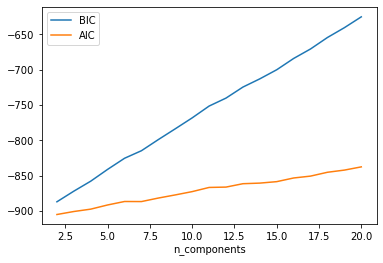

In [63]:
frac = np.array(frac_data_stage3['D2']).reshape(-1, 1)
n_components = np.arange(2, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(frac)
          for n in n_components]

plt.plot(n_components, [m.bic(frac) for m in models], label='BIC')
plt.plot(n_components, [m.aic(frac) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [64]:
gmm=GaussianMixture(n_components=2)
gmm.fit(frac)
result=pd.Series(gmm.predict(frac))
print(result.value_counts())

1    136
0    133
dtype: int64


In [65]:
result = ["stage_3_frac_{}".format(i) for i in result]
result[:5]
stage_3['D2'] = result
# pd.DataFrame(result).to_csv('~/SFD_stage_1.CSV')
stage_3

,SFD,SandBox,D1,D2
0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0
1,stage_3_frac_1,stage_3_frac_1,stage_3_frac_1,stage_3_frac_1
2,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0
3,stage_3_frac_0,stage_3_frac_0,stage_3_frac_1,stage_3_frac_0
4,stage_3_frac_0,stage_3_frac_0,stage_3_frac_1,stage_3_frac_0
...,...,...,...,...
264,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0
265,stage_3_frac_1,stage_3_frac_0,stage_3_frac_1,stage_3_frac_1
266,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0
267,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0


In [66]:
mean = ','.join(["%.3e"%i[0] for i in gmm.means_])
var = ','.join(["%.3e"%i[0][0] for i in gmm.covariances_])
weight = ','.join(["%.3e"%i for i in gmm.weights_])
params_df.loc[('stage_3', 'D2'), :] = [mean, var, weight]
# pd.DataFrame(data=[[mean, var, weight]], index=[('stage_1', 'SFD')], columns=['Means', 'Variances', 'Weights'])
params_df

Means  \
Stage   dimension                                  
stage_1 SFD        1.274e+00,1.434e+00,1.376e+00   
        SandBox    1.616e+00,1.560e+00,1.476e+00   
        D1                   2.084e+00,2.123e+00   
        D2         1.375e+00,1.473e+00,1.529e+00   
        RFD        2.289e+00,2.334e+00,2.312e+00   
stage_2 SFD        1.514e+00,1.558e+00,1.461e+00   
        SandBox    1.681e+00,1.571e+00,1.635e+00   
        D1                   2.232e+00,2.161e+00   
        D2                   1.629e+00,1.567e+00   
        RFD                  2.294e+00,2.265e+00   
stage_3 SFD                  1.566e+00,1.509e+00   
        SandBox              1.691e+00,1.616e+00   
        D1                   2.276e+00,2.198e+00   
        D2                   1.618e+00,1.568e+00   
        RFD                                  NaN   

                                       Variances  \
Stage   dimension                                  
stage_1 SFD        1.575e-03,7.526e-04,6.854e-04   
        SandBox    5.126e-04,5.303e-04,1.459e-03   
        D1                   8.045e-04,7.311e-04   
        D2         4.766e-03,1.034e-03,7.910e-04   
        RFD        9.123e-05,1.709e-04,7.603e-05   
stage_2 SFD        7.344e-04,1.069e-03,6.743e-04   
        SandBox    2.543e-04,9.810e-04,3.456e-04   
        D1                   8.604e-04,9.106e-04   
        D2                   1.452e-03,1.630e-03   
        RFD                  2.378e-04,1.710e-04   
stage_3 SFD                  1.155e-03,1.699e-03   
        SandBox              6.882e-04,1.877e-03   
        D1                   2.118e-03,1.947e-03   
        D2                   1.043e-03,1.591e-03   
        RFD                                  NaN   

                                         Weights  
Stage   dimension                                 
stage_1 SFD        5.722e-02,5.933e-01,3.495e-01  
        SandBox    4.920e-01,3.707e-01,1.373e-01  
        D1                   4.620e-01,5.380e-01  
        D2         9.083e-02,4.573e-01,4.519e-01  
        RFD        4.058e-01,1.543e-01,4.399e-01  
stage_2 SFD        4.305e-01,3.630e-01,2.066e-01  
        SandBox    5.968e-01,9.508e-02,3.081e-01  
        D1                   5.240e-01,4.760e-01  
        D2                   5.162e-01,4.838e-01  
        RFD                  4.441e-01,5.559e-01  
stage_3 SFD                  5.176e-01,4.824e-01  
        SandBox              6.906e-01,3.094e-01  
        D1                   4.583e-01,5.417e-01  
        D2                   4.812e-01,5.188e-01  
        RFD                                  NaN

### RFD fractal dimension hierarchies in stage 3

Text(0.5, 0, 'n_components')

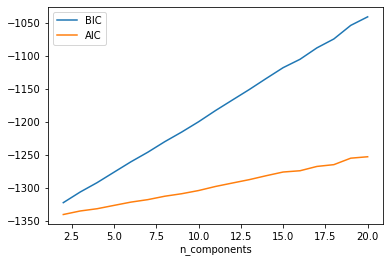

In [67]:
frac = np.array(frac_data_stage3['RFD']).reshape(-1, 1)
n_components = np.arange(2, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(frac)
          for n in n_components]

plt.plot(n_components, [m.bic(frac) for m in models], label='BIC')
plt.plot(n_components, [m.aic(frac) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [68]:
gmm=GaussianMixture(n_components=2)
gmm.fit(frac)
result=pd.Series(gmm.predict(frac))
print(result.value_counts())

1    136
0    133
dtype: int64


In [69]:
result = ["stage_3_frac_{}".format(i) for i in result]
result[:5]
stage_3['RFD'] = result
# pd.DataFrame(result).to_csv('~/SFD_stage_1.CSV')
stage_3

,SFD,SandBox,D1,D2,RFD
0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_1
1,stage_3_frac_1,stage_3_frac_1,stage_3_frac_1,stage_3_frac_1,stage_3_frac_1
2,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0
3,stage_3_frac_0,stage_3_frac_0,stage_3_frac_1,stage_3_frac_0,stage_3_frac_1
4,stage_3_frac_0,stage_3_frac_0,stage_3_frac_1,stage_3_frac_0,stage_3_frac_1
...,...,...,...,...,...
264,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0
265,stage_3_frac_1,stage_3_frac_0,stage_3_frac_1,stage_3_frac_1,stage_3_frac_1
266,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0
267,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0,stage_3_frac_0


In [70]:
mean = ','.join(["%.3e"%i[0] for i in gmm.means_])
var = ','.join(["%.3e"%i[0][0] for i in gmm.covariances_])
weight = ','.join(["%.3e"%i for i in gmm.weights_])
params_df.loc[('stage_3', 'RFD'), :] = [mean, var, weight]
# pd.DataFrame(data=[[mean, var, weight]], index=[('stage_1', 'SFD')], columns=['Means', 'Variances', 'Weights'])
params_df

Means  \
Stage   dimension                                  
stage_1 SFD        1.274e+00,1.434e+00,1.376e+00   
        SandBox    1.616e+00,1.560e+00,1.476e+00   
        D1                   2.084e+00,2.123e+00   
        D2         1.375e+00,1.473e+00,1.529e+00   
        RFD        2.289e+00,2.334e+00,2.312e+00   
stage_2 SFD        1.514e+00,1.558e+00,1.461e+00   
        SandBox    1.681e+00,1.571e+00,1.635e+00   
        D1                   2.232e+00,2.161e+00   
        D2                   1.629e+00,1.567e+00   
        RFD                  2.294e+00,2.265e+00   
stage_3 SFD                  1.566e+00,1.509e+00   
        SandBox              1.691e+00,1.616e+00   
        D1                   2.276e+00,2.198e+00   
        D2                   1.618e+00,1.568e+00   
        RFD                  2.276e+00,2.302e+00   

                                       Variances  \
Stage   dimension                                  
stage_1 SFD        1.575e-03,7.526e-04,6.854e-04   
        SandBox    5.126e-04,5.303e-04,1.459e-03   
        D1                   8.045e-04,7.311e-04   
        D2         4.766e-03,1.034e-03,7.910e-04   
        RFD        9.123e-05,1.709e-04,7.603e-05   
stage_2 SFD        7.344e-04,1.069e-03,6.743e-04   
        SandBox    2.543e-04,9.810e-04,3.456e-04   
        D1                   8.604e-04,9.106e-04   
        D2                   1.452e-03,1.630e-03   
        RFD                  2.378e-04,1.710e-04   
stage_3 SFD                  1.155e-03,1.699e-03   
        SandBox              6.882e-04,1.877e-03   
        D1                   2.118e-03,1.947e-03   
        D2                   1.043e-03,1.591e-03   
        RFD                  2.422e-04,2.143e-04   

                                         Weights  
Stage   dimension                                 
stage_1 SFD        5.722e-02,5.933e-01,3.495e-01  
        SandBox    4.920e-01,3.707e-01,1.373e-01  
        D1                   4.620e-01,5.380e-01  
        D2         9.083e-02,4.573e-01,4.519e-01  
        RFD        4.058e-01,1.543e-01,4.399e-01  
stage_2 SFD        4.305e-01,3.630e-01,2.066e-01  
        SandBox    5.968e-01,9.508e-02,3.081e-01  
        D1                   5.240e-01,4.760e-01  
        D2                   5.162e-01,4.838e-01  
        RFD                  4.441e-01,5.559e-01  
stage_3 SFD                  5.176e-01,4.824e-01  
        SandBox              6.906e-01,3.094e-01  
        D1                   4.583e-01,5.417e-01  
        D2                   4.812e-01,5.188e-01  
        RFD                  4.995e-01,5.005e-01

In [71]:
stage_3.columns = ['frac_' + i for i in stage_3.columns]
stage_3.to_csv(os.getcwd() + '/fractal_ hierarchies_stage_3.csv')

In [72]:
params_df.to_csv(os.getcwd() + '/Gaussian_Mixture_Distribution_Parameters.csv')

In [77]:
stage_1.append(stage_2).append(stage_3).to_csv(os.getcwd() + '/fractal_ hierarchies.csv')